# Count Entity

In [214]:

import re

import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt

In [229]:
def count_entity(file):
    entity = []
    merge_entity = []
    tmp = ''
    # file = 'entity-tag/AskWhereHRRoomIs.csv'
    with open(file, 'r') as f:
        for word in f:
            word = word.split()
            for x in word:
                x = x.split()
                for i in x:
                    if '/' in i:
                        # print(i)
                        entity.append(i)
    for j in range(len(entity)):
        if ('/B-' in entity[j]):
            tmp = entity[j]
            merge_entity.append(tmp)
        if ("/I-" in entity[j]):
            tmp = merge_entity[-1] + ' ' + entity[j]
            merge_entity[-1] = tmp
    entity_name = []
    entity_type = []
    for j in range(len(entity)):
        if ('/B-' in entity[j]):
            x = entity[j]
            tmp = x.split('/')
            entity_name.append(tmp[0])
            entity_type.append(tmp[1])
            merge_entity.append(tmp[0])
        if ("/I-" in entity[j]):
            x = entity[j]
            y = x.split('/')
            tmp = merge_entity[-1] + ' ' + y[0]
            merge_entity[-1] = tmp
            entity_name[-1] = tmp
            entity_type[-1] = y[1]
    entity_df = pd.DataFrame([entity_name,entity_type], index=['Object', 'Entity']).T
    entity_df[["x", 'Entity']] = entity_df["Entity"].str.split("-", 1, expand=True)
    entity_df.drop(['x'], axis=1, inplace=True)
    
    return entity_df
count_entity('entity-tag/FindECInfo.csv')

,Object,Entity
0,ពាណិជ្ជកម្ម អេឡិចត្រូនិច,MAJOR
1,ពាណិជ្ជកម្ម អេឡិចត្រូនិច,MAJOR
2,ពាណិជ្ជកម្ម អេឡិចត្រូនិច,MAJOR
3,ពាណិជ្ជកម្ម អេឡិចត្រូនិច,MAJOR
4,ពាណិជ្ជកម្ម អេឡិចត្រូនិច,MAJOR
...,...,...
495,EC,MAJOR
496,EC,MAJOR
497,EC,MAJOR
498,EC,MAJOR


Entity
--------------------  ---
បន្ទប់ HR               360
បន្ទប់ បុក្គលិក            360
បន្ទប់ ធនធាន មនុស្        360
Department HR         360
នាយកដ្ឋាន ធនធាន មនុស្ស   360
ដេប៉ាទី ម៉ង់ ធនធាន មនុស្ស   355
Dara                  280
បង Chanto             280
បង រិទ្ធ                280
bong rith             280
ដារា                  280
ដេប៉ាទី ម៉ង់ HR           230
ដេប៉ា ទី ម៉ង់ HR          129
ដេប៉ា ទី ម៉ង់ ធនធាន មនុស្ស    5
ដេប៉ា ទី ម៉ង់ HR ?          1
--------------------  ---


<AxesSubplot:xlabel='Object'>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6035 (\N{KHMER LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6070 (\N{KHMER VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6041 (\N{KHMER LETTER YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6016 (\N{KHMER LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/

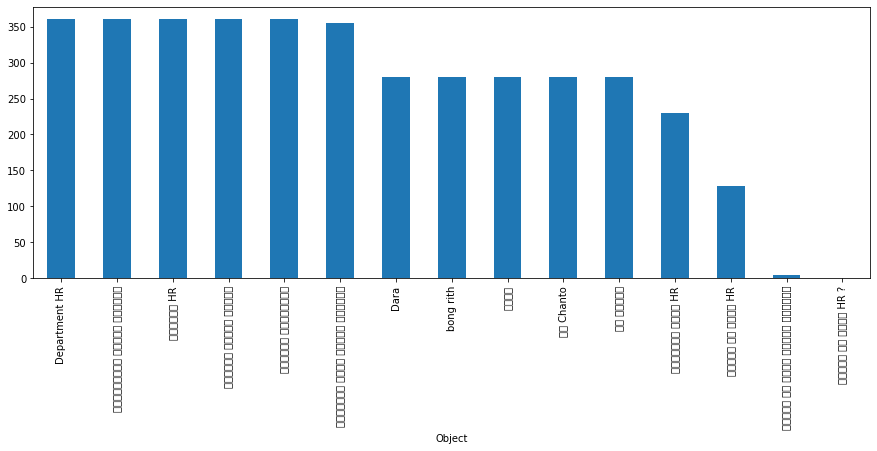

In [234]:
entity = []
merge_entity = []
tmp = ''
with open("entity-tag/AskWhereHRRoomIs.csv", 'r') as f:
    for word in f:
        word = word.split()
        for x in word:
            x = x.split()
            for i in x:
                if '/' in i:
                    # print(i)
                    entity.append(i)
for j in range(len(entity)):
    if ('/B-' in entity[j]):
        tmp = entity[j]
        merge_entity.append(tmp)
    if ("/I-" in entity[j]):
        tmp = merge_entity[-1] + ' ' + entity[j]
        merge_entity[-1] = tmp
entity_name = []
entity_type = []
for j in range(len(entity)):
    if ('/B-' in entity[j]):
        x = entity[j]
        tmp = x.split('/')
        entity_name.append(tmp[0])
        entity_type.append(tmp[1])
        merge_entity.append(tmp[0])
    if ("/I-" in entity[j]):
        x = entity[j]
        y = x.split('/')
        tmp = merge_entity[-1] + ' ' + y[0]
        merge_entity[-1] = tmp
        entity_name[-1] = tmp
        entity_type[-1] = y[1]
entity_df = pd.DataFrame([entity_name,entity_type], index=['Object', 'Entity']).T
entity_df[["x", 'Entity']] = entity_df["Entity"].str.split("-", 1, expand=True)
entity_df.drop(['x'], axis=1, inplace=True)



print("Entity")
from tabulate import tabulate
print(tabulate(pd.DataFrame(entity_df["Object"].value_counts())))

plt.figure(figsize=(15,5));
entity_df.groupby("Object")["Object"].count().sort_values(ascending=False).plot(kind="bar")


# print (count)
# entity_df
